# Introduction to Algorithms
Step 2 of 6

Topics Covered:
* How to analyze the time complexity of an algorithm
* How to analyze the space complexity of an algorithm
* Techniques to trade memory for speed

## Time Complexity of Algorithms
Here, we will learn how to analyze how good an algorithm is in terms of <em>speed</em> and <em>memory</em>. Simply put, an algorithm is a program or function that solves some specific problem. For example, a sorting algorithm is an algorithm that, given a list of values, outputs that same list of values but rearranges them in increasing (or decreasing) order.

For any given problem, there are numerous ways to write an algorithm that solves it. In this course, you'll learn how to compare these algorithms and find the one that will perform the best.

Let's start by writing an algorithm that, given a list of numbers, outputs the maximum value of that list. After all, before we can start analyzing algorithms, we need to have some algorithms to analyze.

In [3]:
## Implement basic maximum function
test_values = [4, 3, 5, 6, 2, 1]

def maximum(values):
    answer = None
    for value in values:
        if answer == None or value > answer:
            answer = value
    return answer

max_value = maximum(test_values)
print(max_value)

6


### Measuring the Execution Time
On this screen, we're going to learn how to measure the execution time of a Python function. Ultimately, our goal is not to measure the time of a specific execution of an algorithm, but rather to analyze the algorithm and predict how the execution time will evolve as data grows larger.

Intuitively, the more data an algorithm needs to process, the more time it will take to run. What we are interested in is building a model that tells us by how much the execution time grows as we increase the amount of data. We call these models the time complexity of an algorithm. By analyzing the time complexity of an algorithm, we want to be able to answer questions like:

*If we double the data, do we double the execution time, do we quadruple it, or something else entirely?*

Our starting point will be measuring execution times because it will help us build valuable intuition. Let's start by learning how to measure the execution time of a Python function.

Python offers a few different ways to do this. In this mission, we will use the [time module](https://docs.python.org/3/library/time.html). Calling the `time.time()` function, we get the total number of seconds that have passed from January 1, 1970, until now (depending on your OS, this date might change, but that does not matter for what follows).

Try running the following code:

In [6]:
import time
print(time.time())

1606077257.8584745


In [8]:
# How old is this Dataquest lesson? Let's find out:
created = 1582797144.388745
current = time.time()
elapsed_days = (current - created) / (3600 * 24)
print(elapsed_days)

269.44677262706335


Using the `time.time()` function, we can measure the time a Python function takes to execute by computing the difference between the time just after the function finishes executing and the time just before it started executing. If we call the time just before the execution `start` and the time just after `end`, then the execution time of the function will be `end - start` — as shown in blue on the following diagram:
![execution time](https://dq-content.s3.amazonaws.com/476/time.png)

In [12]:
test_values = [num * 2 for num in range(1,1001,2)]

start = time.time()
max_value = maximum(test_values)
end = time.time()
runtime = end - start
print(runtime)

0.0


Just a single measurement doesn't help us understand how the maximum() function behaves in terms of execution time.

Let's make the input length vary from length 1 to 500 and collect the execution time for each of them. The goal is to have an insight into how the execution evolves as the length of the list grows.

To do our experiment, we will need to have input lists with sizes 1 to 500 to execute the maximum() function. One way to generate these inputs is to use the random module. This module provides, among other things, the random.randint() function that, given two integers a and b, outputs a random number between a and b (inclusive).

Using list comprehensions, we can use the random.randint() function to generate a random list of length 500 with values, say, from -1,000 to 1,000, as follows:

In [14]:
import random
values = [random.randint(-1000, 1000) for _ in range(500)]

Notice that we used the `_` notation in the above `for` loop. This is a notation that can be used when we do not use the iteration variable. It gives the exact same result that we would get using some variable name, but avoids having to find a name for something that we will not use.

Since we want to be able to generate inputs of lengths 1 to 500, it is convenient to define a function that takes as input a length and outputs a random list of the given length:

In [15]:
def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

In [20]:
times = []
for length in range(1,501):
    values = gen_input(length)
    start = time.time()
    maximum(values)
    end = time.time()
    runtime = end - start
    times.append(runtime)

The printed results are hard to read, so let's plot these times for visualizing how they are growing:
![runtime](https://dq-content.s3.amazonaws.com/476/plot1.png)
We can see some spikes on the execution times at some points. These are due to external factors such as CPU load, memory management, among others. However, despite the lack of accuracy of these measures, we can see a line forming underneath, which roughly describes how the execution time is increasing. This is shown in red in the following plot:

![runtime plot](https://dq-content.s3.amazonaws.com/476/plot2.png)

We can see that as the data increases, so does the execution time. This is not surprising since there is more data to process. However, this tells us more. It gives us an insight on the rate at which it is increasing. The red line is a straight line, which means that the time is growing somewhat proportionally with the data.

This is good news because it means that the execution time grows at the same rate as the data. Doubling the amount of data will double the amount of time needed to process it.

The purpose of this mission is to learn how to look at an algorithm and derive a mathematical expression for the red line. As mentioned before, we call such an expression the **time complexity of the algorithm**:

![time complexity model](https://dq-content.s3.amazonaws.com/476/real_vs_model.png)

### Measure `sum_values()` on inputs

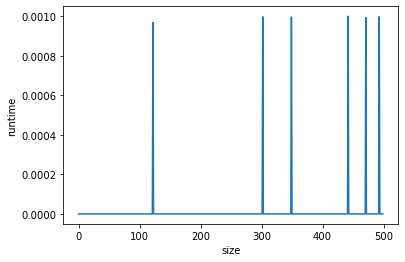

In [23]:
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

def plot_times(times):
    plt.plot(times)
    plt.ylabel('runtime')
    plt.xlabel('size')
    plt.show()

def sum_values(values):
    total = 0            
    for value in values: 
        total += value   
    return total  

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below
times = []
for length in range(1, 501):
    values = gen_input(length)
    start = time.time()
    sum_values(values)
    end = time.time()
    runtime = end - start
    times.append(runtime)

plot_times(times)

### Worst Case Execution Analysis

In our analysis, we needed to count how many times each line of code was executed. However, we cannot always do that. Consider for instance the `maximum()` function from before:

In [24]:
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

How many times is the line answer = value executed? Well, that depends on the values list. The first time, it is always executed because answer is initially set to None. After that, it depends on the order of the elements in values.

For example, if values = [1, 2, 3, 4, 5] then, at every subsequent iteration, answer < value will be true, so the line will be executed one time for each value. On the other hand, if values = [5, 4, 3, 2, 1] then, the first time answer will be set to 5, and then the line will never be executed again.

We say that the first is a **worst-case** execution analysis and the latter a **best-case** execution analysis. When building a model for the execution time of an algorithm, we often focus on the worst case. There a few reasons for doing so:

1. We usually want to process data from a lot of different sources and, consequently, it turns out that the worst-case actually occurs quite often.
2. It provides an upper bound. By focusing on the worst-case when building the execution time model, we can guarantee that the executions times will always behave at most as badly as the models predicts. Imagine that you are selling an algorithm that 1% of the time takes one second, and 99% takes over one year. If you advertise it as taking one second (best case), your customers will not be very pleased.

**In practice, this means that when building the model, the number of executions that we set for each line of code is the maximum number of times that it can possibly be executed.**

With this in mind, let's build a model for the maximum() function and see whether it matches our experimental prediction.

In [25]:
def maximum(values):
    answer = None                            # c1, 1 time,  c1
    for value in values:                     # c2, N times, c2*N
        if answer == None or answer < value: # c3, N times, c3*N
            answer = value                   # c4, N times, c4*N
    return answer                            # c5, 1 time,  c5

Cleaning up the constants by renaming c2 + c3 + c4 as a and c1 + c5 as b, we again obtain a linear model aN + b , as expected. This confirms our previous experimental results on the `maximum()` function.

In [26]:
def count_zeros(values):
    count = 0            # c1 - once
    for value in values: # c2 - c2*n
        if value == 0:   # c3 - c3*n
            count += 1   # c4 - c4*n
    return count         # c5 - once

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'

correct = model3

### Quadratic Complexity
So far, all the concrete functions that we analyzed had an execution time model that was linear, that is, of the form aN + b. Let's see an example where this is not the case. Consider the following `zero_sum()` function that counts the number of pairs of indexes whose values add up to 0.

In [27]:
def zero_sum(values):
    N = len(values)                          
    count = 0                               
    for i in range(N):                     
        for j in range(N):                    
            if values[i] + values[j] == 0: 
                count += 1                    
    return count

#### Build the Execution Time Model
1. Assign an unknown constant to each line of code.
2. Count how many times each line is executed. Let N denote the number of elements in the `values` list. Remember that we now consider the wrost case. In this case, we'll assume that the `if` condition is always true.
3. Multiply the constant execution time of each line by the number of times the line is executed.
4. Add all values together and group terms.

**Step 1**

In [28]:
def zero_sum(values):
    N = len(values)                        # c1                     
    count = 0                              # c2
    for i in range(N):                     # c3
        for j in range(N):                 # c4
            if values[i] + values[j] == 0: # c5
                count += 1                 # c6
    return count                           # c7

**Step 2**

In [29]:
def zero_sum(values):
    N = len(values)                        # c1, 1 time                     
    count = 0                              # c2, 1 time
    for i in range(N):                     # c3, N times
        for j in range(N):                 # c4, N * N times
            if values[i] + values[j] == 0: # c5, N * N times
                count += 1                 # c6, N * N times
    return count                           # c7, 1 time